# **OPIM 5512: Banking Project: Term Deposit Prediction Model**

# Introduction

   In our analysis the investment and portfolio department of the Bank of Portugal has been conducting direct marketing campaigns to identify potential customers who would subscribe to their term deposits. The objective of our analysis is to develop a robust machine learning algorithm to predict if a potential client will subscribe to the Bank’s term deposits. As well as gain insights into the factors that impact whether or not a customer will subscribe to the term deposits. 

  Direct marketing encompasses direct mailing, digital methods, and telephone mediums each has varying levels of effectiveness and costs associated with them. Of the three sales calls have the highest cost per lead. According to Harvard Business review the cost per lead was 49 dollars in 1969 increasing to a cost of 137 dollars in 1979 and the cost has continued to grow ever since. Despite this it offers a range of benefits in that it has the highest conversion rates of the strategies and results are realized quicker in that you get a yes not response almost immediately. 

  Accurately identify the customers that are likely to purchase a product has the potential to make marketing campaigns more effective and reduce the costs associated with contacting people who will not buy the product. Additionally gaining insights into the factors that have the biggest impact on a sale can help an organization to tailor the marketing strategies meet the needs of their customers and organization. 


# Literature Review

This dataset is popular for use in both academic and educational settings. And you can find analysis of it in academic articles and on sites such as Kaggle. A reason for this datasets popularity is that A limitation of many of these approaches is that they focus purely on the modeling aspect of the dataset with limited insights being given into how the information gained from data exploration and generating the models can be used to improve the effectiveness of a business.

“Classification is the most common DM task, and the goal is to build a data-driven model that learns an unknown underlying function that maps several input variables, which characterize an item (e.g., bank client), with one labeled output target (e.g., type of bank deposit sell: “failure” or “success”) (Moro 2014). There are many approaches documented within the literature of using various machine learning techniques within the literature to address these types of questions. Popular approaches being logistic regressions, decision trees, neural networks, and support vector machines. Each have their advantages and disadvantages in particular the results generated from the logistic regression and decision tree are the easiest to explain of the models mentioned. According to Moro the model the performs best on a specific classification problem can vary emphasizing the problem of context and supporting the need to try several different models prior to selecting one. 

There is a wide range of research into using data mining techniques int the banking industry. “However, the research is rather scarce in terms of the specific area of banking client targeting (Moro 2014). Scarcity of information and the popularity of classification problems in datamining may contribute to why this is such a common dataset for analysis. Overall the concept of identify the est set of clients, that are more likely to subscribe to a product is considered Np-Hard(Morro 201).

In the literate most approaches use some variation of the logistic regression, decision tree, neural network, or support vector machine models to achieve their results. Features were commonly selected with a combination of statistical analysis and business knowledge and often time resulted in models that generated results within a range of 80%-90% accuracy. Support Vector Machines appeared to consistently perform well when addressing these types of problems.

In our analysis we will utilize similar techniques to those that are commonly found in the literature to generate and compare our models. The literature focuses primarily on feature selection and model performance and in our analysis, we are looking to achieve high predictive accuracy but also gain an understanding of the variables that contribute to the predictions in order to generate specific business recommendations. 


# Exploratory Data Analysis



**Data Set Information**

The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be subscribed ('yes') or not ('no') subscribed.

Goal:- The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

**Features**

|Feature|Feature_Type|Description|
|-----|-----|-----|
|age|numeric|age of a person|  
|job |Categorical,nominal|type of job ('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')|  
|marital|categorical,nominal|marital status ('divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)|  
|education|categorical,nominal| ('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') | 
|default|categorical,nominal| has credit in default? ('no','yes','unknown')|  
|housing|categorical,nominal| has housing loan? ('no','yes','unknown')|  
|loan|categorical,nominal| has personal loan? ('no','yes','unknown')|  
|contact|categorical,nominal| contact communication type ('cellular','telephone')|  
|month|categorical,ordinal| last contact month of year ('jan', 'feb', 'mar', ..., 'nov', 'dec')| 
|day_of_week|categorical,ordinal| last contact day of the week ('mon','tue','wed','thu','fri')|  
|duration|numeric| last contact duration, in seconds . Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no')|
|campaign|numeric|number of contacts performed during this campaign and for this client (includes last contact)|  
|pdays|numeric| number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)|  
|previous|numeric| number of contacts performed before this campaign and for this client|  
|poutcome|categorical,nominal| outcome of the previous marketing campaign ('failure','nonexistent','success')|  

**Target variable (desired output):**  

|Feature|Feature_Type|Description|
|-----|-----|-----|
|y | binary| has the client subscribed a term deposit? ('yes','no')|

###  Importing necessary libraries



In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import * # using the simpler interface (for plotting) to matplotlib 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install pyod

from pyod.models.knn import KNN
#from imblearn.over_sampling import RandomOverSampler, SMOTE
#from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
#import xgboost as xgb

from sklearn.model_selection import cross_val_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.linear_model import LogisticRegression
#from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.ensemble import IsolationForest

## Data Loading




Load the dataset

- In this task, we'll load the dataframe in pandas, drop the unnecessary columns and display the top five rows of the dataset. We will also begin data exploration techniques by creating visuals for variables in groups of 5, since we have 20 variables in the dataset and 4 team members, this worked out nicely. This allowed us to see the correlation between smaller groups of variables before we explored even further.

Here, we are importing the modules needed, mounting the google drive and reading the data we will be visualizing and explaining.

In [8]:
path = 'G:\\MSBAPM Study\\Resume\\Projects\\Github\\Bank Term Deposite\\bank-additional-full.csv' 
# Load the dataframe
df = pd.read_csv(path, sep= ';')

In [9]:
print('Shape of the data is: ', df.shape)
df.head()

Shape of the data is:  (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

SEMMA Approach

##About the Dataset

This step entails choosing a subset of the appropriate volume dataset from a vast dataset that has been given for the model’s construction.


Data Source - Link to dataset: https://archive.ics.uci.edu/ml/datasets/bank+marketing


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [12]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Subset for housing, loan, contact, month, day_of_week

In [13]:
df_dets = df.iloc[: , 5:10]

In [14]:
df_dets.head()

,housing,loan,contact,month,day_of_week
0,no,no,telephone,may,mon
1,no,no,telephone,may,mon
2,yes,no,telephone,may,mon
3,no,no,telephone,may,mon
4,no,yes,telephone,may,mon


##Data Exploration and Visualization

During this step, multiple analysis is conducted in order to study interconnected relationships between data elements and to identify gaps in the data. All of the influencing factors that may influence the study’s outcome are analyzed, with heavy reliance on data visualization.


Data Exploration: To begin exploring our data and understanding each of the variables, we began by using several visualization techniques amongst the variables.We primarily used Seaborn and matplotlib to create a variety of plots, graphs and maps. These libraries allowed us to identify trends in the data and also discover any outliers. We also used correlation heat maps between variables which helped to highlight any positive or negative relationships between them. We could then use this information to focus on the more important variables and create even more visuals for ones with strong correlations. 


Data Visualizations for housing, loan, contact, month, day_of_week

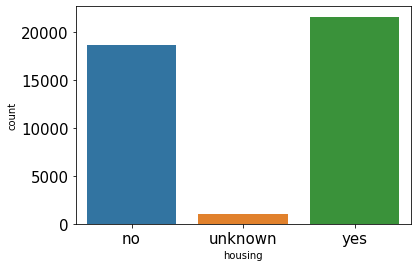

In [15]:
# Housing
sns.countplot(x = 'housing', data = df_dets, order = ['no', 'unknown', 'yes'])
tick_params(labelsize=15)


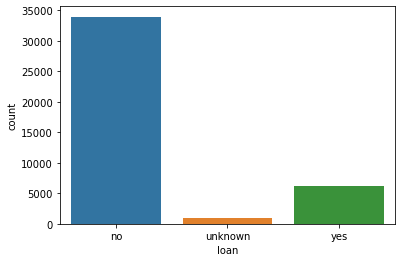

In [16]:
# Loan
sns.countplot(x = 'loan', data = df_dets, order = ['no', 'unknown', 'yes'])
plt.subplots_adjust(wspace=0.25)

In [17]:
print("Kind of Contact: \n", df_dets['contact'].unique())
print("\nWhich monthis this campaing work: \n", df_dets['month'].unique())
print("\nWhich days of week this campaing work: \n", df_dets['day_of_week'].unique())

Kind of Contact: 
 ['telephone' 'cellular']

Which monthis this campaing work: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Which days of week this campaing work: 
 ['mon' 'tue' 'wed' 'thu' 'fri']


**Count Plots**: Count plots are a feature within Seaborn that allow us to create straight forward visualizations for categorical variables.These graphs include the method of contacting the customers, the month and day of the week it took place. As you can see, it is a simple bar graph but easily tells us how much of the data falls within each category of the variable and how the data is spread out.


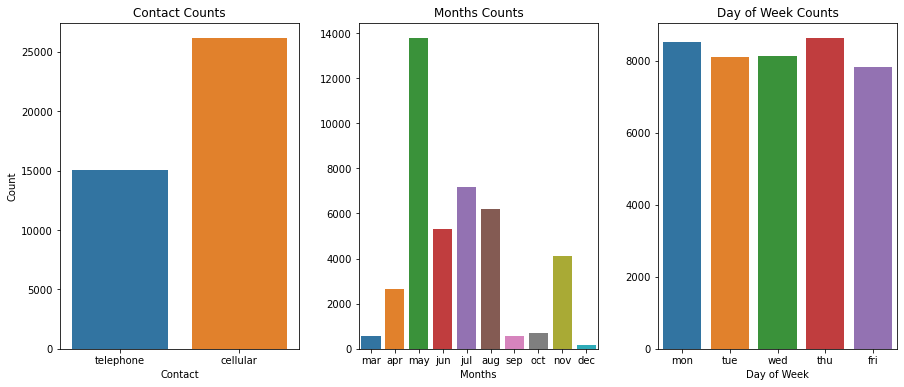

In [18]:
#Contact
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(df_dets['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

#Month
sns.countplot(df_dets['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

#day_of_week

sns.countplot(df_dets['day_of_week'], ax = ax3)
ax3.set_xlabel('Day of Week', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

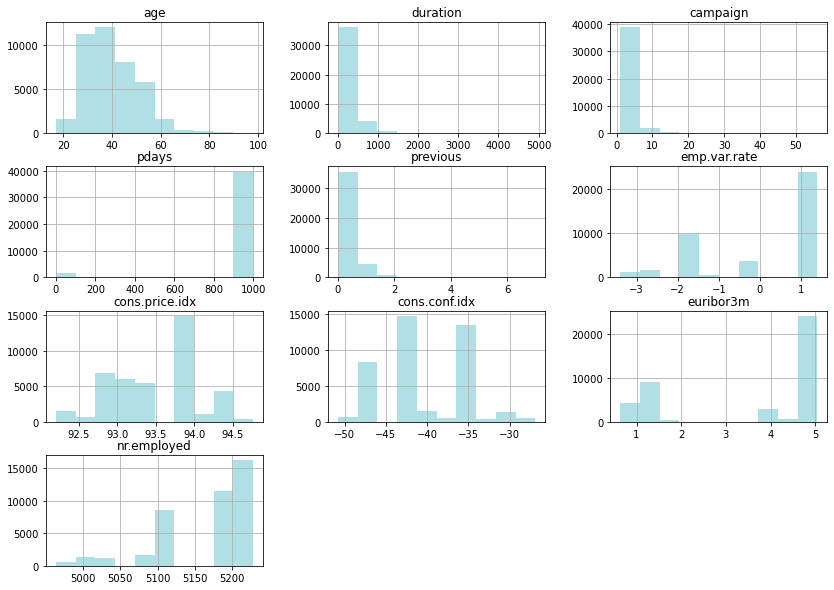

In [19]:
df.hist(bins= 10, figsize=(14, 10), color='powderblue')
plt.show()

**Box Plots & Histograms:** These features are more applicable for numerical variables within our data set. They also allow us to easily identify outliers or any other unique features of the variable. For example, in the pdays variable on the bottom left, which represents the  number of days that passed by after the client was last contacted from a previous campaign , and if the customer was not contacted again, it is assigned a value of 999. As you can see in the graph, the majority of the data is marked as 999. This was helpful for us to discover since this would impact the coefficient of the variable and we were able to take precautionary measures to avoid this from happening. 

In [20]:
df.rename(columns={'y':'deposit'}, inplace=True)
monthly_sub = pd.crosstab(df['month'], df['deposit']).apply(lambda x: x/x.sum() * 100)
monthly_sub.sort_values(by='yes', ascending=False)

deposit,no,yes
month,,
may,35.249535,19.094828
aug,15.111634,14.116379
jul,17.853234,13.987069
jun,13.021232,12.047414
apr,5.726716,11.616379
nov,10.082631,8.965517
oct,1.102660,6.788793
mar,0.738755,5.948276
sep,0.859144,5.517241


**Multiple Chart Types:** For the target variable we were able to rely on the pie chart to give us an accurate percentage for how many people were accepting or declining the term deposit. In variables with many categories, a pie chart can become unclear and clustered, however, for our target variable, this proved to be more beneficial than a bar or count graph.


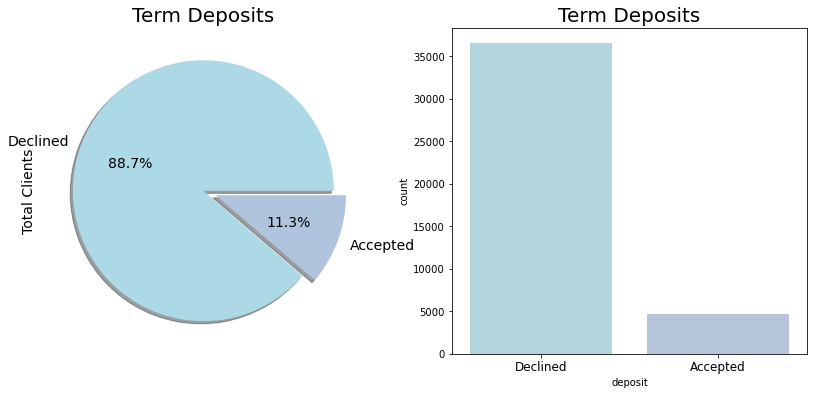

In [21]:
f,ax=plt.subplots(1,2, figsize=(14,6))
labels = 'Declined', 'Accepted'
df['deposit'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=14,colors = ["lightblue","lightsteelblue"])
ax[0].set_title('Term Deposits', fontsize=20)
ax[0].set_ylabel('Total Clients', fontsize=14)
sns.countplot('deposit',data=df,ax=ax[1], palette=["lightblue","lightsteelblue"])
ax[1].set_title('Term Deposits', fontsize=20)
ax[1].set_xticklabels(['Declined', 'Accepted'], fontsize=12)
plt.show()

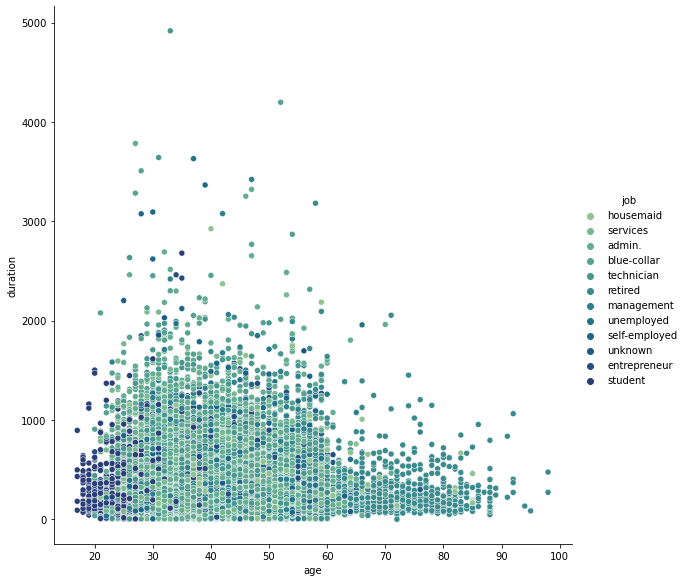

In [22]:
#sns.set_palette("Paired")
sns.relplot(x="age", y="duration", height= 8, aspect=1, hue="job", data=df, palette="crest")
plt.show()

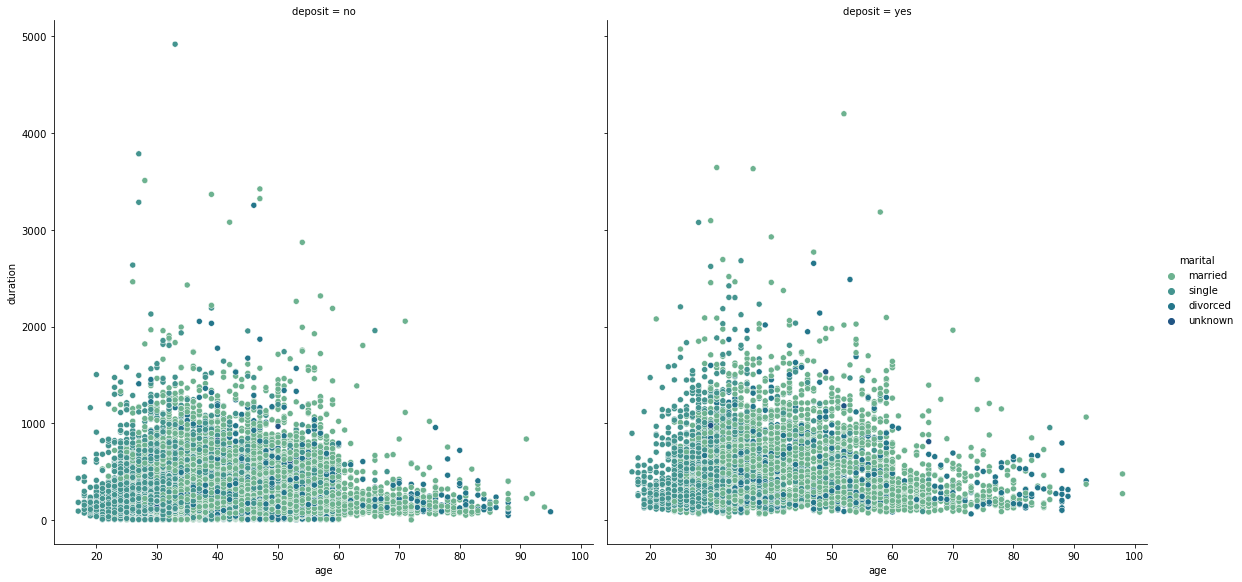

In [23]:
sns.relplot(x="age", y="duration", height= 8, aspect=1, hue="marital", col="deposit", data=df, palette="crest")
plt.show()

In [24]:
X = df.deposit.value_counts()
X

no     36548
yes     4640
Name: deposit, dtype: int64

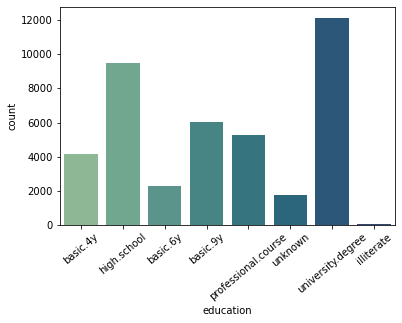

In [25]:
sns.countplot(x="education", data=df, palette="crest")
plt.xticks(rotation = 40)
plt.show()

**Relation Plots:** The relation plot feature within seaborn was also very helpful for us. It allows us to examine two variables with different subplots. For example, both of these graphs are Age vs. Duration. However, on the left are people who agreed to the term deposit or “yes” and the right is people who said “no”. The color coded dots are based off of the Marriage variable which represents their marital status as married, single, divorced, or unknown. 


<Figure size 700x600 with 0 Axes>

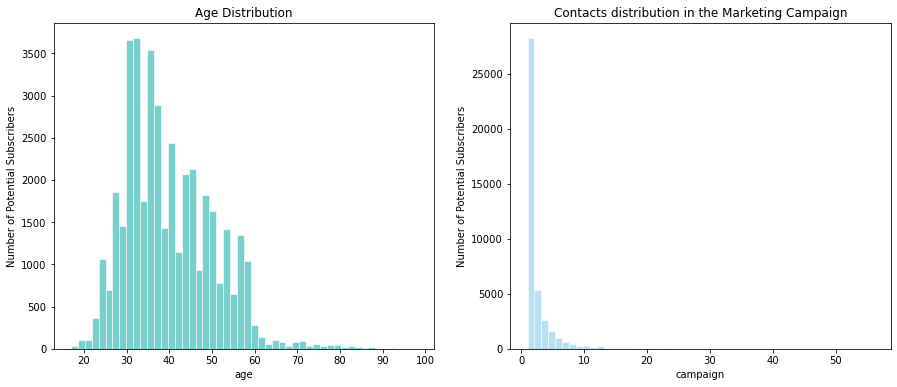

In [26]:
# Plot
kwargs = dict(hist_kws={'alpha':.6, 'edgecolor':"white"}, kde_kws={'linewidth':2})
plt.figure(figsize=(7,6), dpi= 100) # Adding bar color and edge color

f, axes = plt.subplots(ncols=2, figsize=(15, 6))

sns.distplot(df['age'], kde=False, ax=axes[0], color="lightseagreen", **kwargs).set_title('Age Distribution')
axes[0].set_ylabel('Number of Potential Subscribers')


sns.distplot(df['campaign'], kde=False, ax=axes[1], color="skyblue", **kwargs).set_title('Contacts distribution in the Marketing Campaign')
axes[1].set_ylabel('Number of Potential Subscribers')

plt.show()

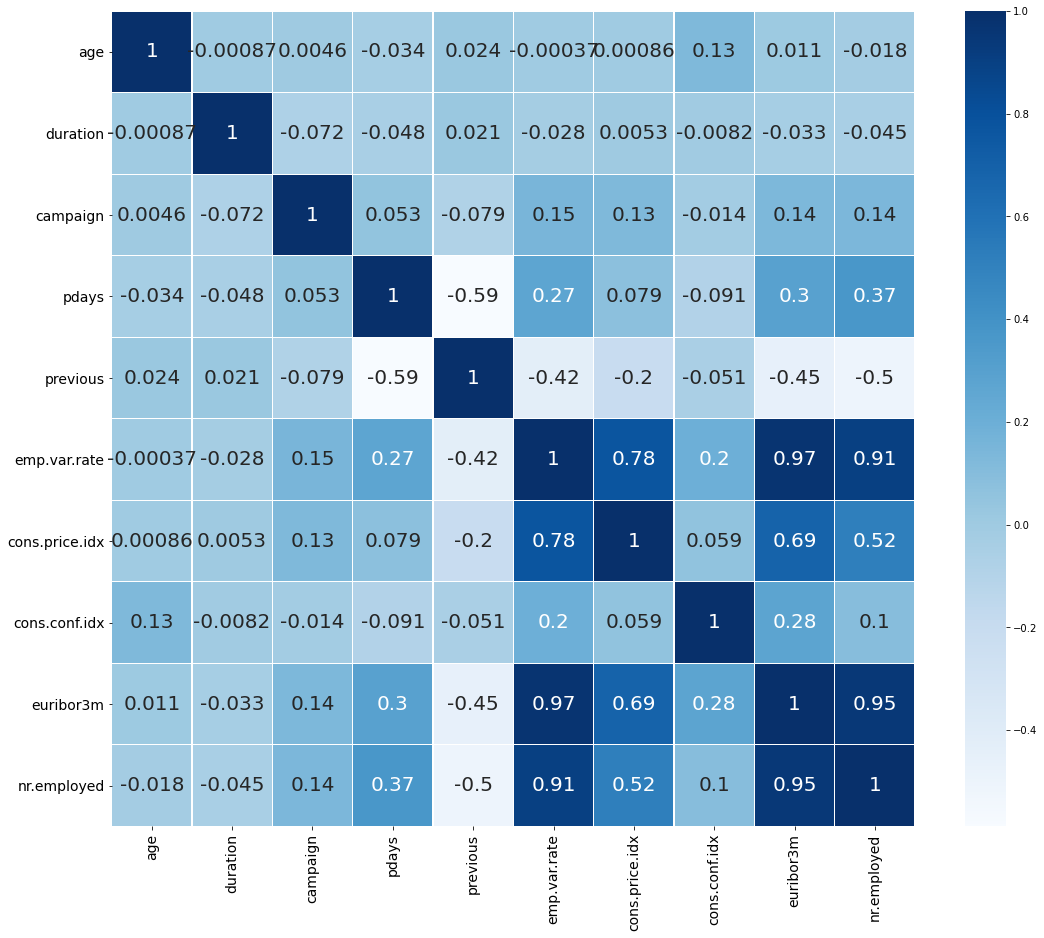

In [27]:
corr = df.corr()

sns.heatmap(corr,annot=True,cmap='Blues',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

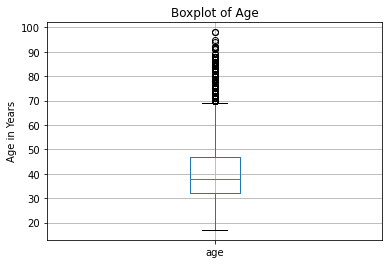

In [28]:
# Boxplot for age
df.boxplot(['age']) # creating a boxplot for the variable 'sepal_length'
plt.title("Boxplot of Age") # Adding a title
plt.ylabel('Age in Years') # Adding a label for y-axix

plt.show() # Removing any extra text

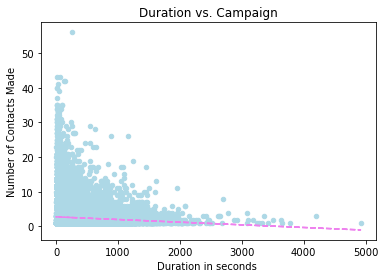

In [29]:
# Scatterplot for petal Duration vs. Campaign
df.plot.scatter(x='duration', y='campaign', color='lightblue') # Creating a scatterplot with the variables given explicitly
plt.xlabel("Duration in seconds ")  # X-axix
plt.ylabel("Number of Contacts Made")  # Y-axis
plt.title("Duration vs. Campaign") # Title

# add a regression line
x = df['duration']
y = df['campaign']
m, b = np.polyfit(x, y, 1) # m = slope, b = intercept
plot(x, m*x + b, 'b--', color='violet')

plt.show() # Removing any extra text

**Density Plot**: Density plots are useful for studying the distribution of variables whether they are categorical or numerical. We were able to overlap or layer multiple categories as well which was utilized often for comparing the Accepted and Declined rates in the target variable amongst the other ones. For this example, we can see the age of the client on the X axis, the density or frequency of whether they accepted or declined the term deposit. 


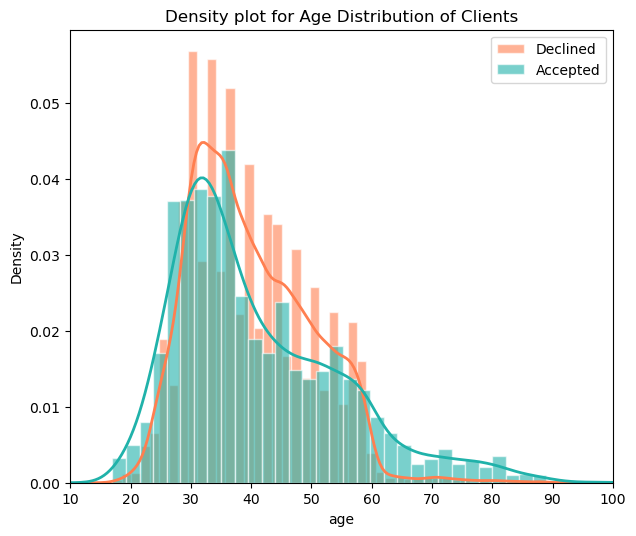

In [30]:
import seaborn as sns # importing seaborn package for better visualizations

# Grouping records by deposit variable and passing age
a = df.loc[df['deposit']=='yes', 'age'] 
b = df.loc[df['deposit']=='no', 'age']

# Plot
kwargs = dict(hist_kws={'alpha':.6, 'edgecolor':"white"}, kde_kws={'linewidth':2})
plt.figure(figsize=(7,6), dpi= 100) # Adding bar color and edge color

# Creating the plots for each of the 'deposit' sub groups 

sns.distplot(b, color="coral", label="Declined", **kwargs)
sns.distplot(a, color="lightseagreen", label="Accepted", **kwargs)

plt.title('Density plot for Age Distribution of Clients') # Adding a Title
plt.ylabel('Density') # Adding Y-axis label
plt.xlim(10,100) # Specifying the scale for x-axis 
plt.legend() # Adding a legend
plt.show() 

**Variables 11-15: Duration, campaign, pdays, previous, poutcome**

In [31]:
dfArya = df[['duration', 'campaign', 'pdays', 'previous', 'poutcome']].copy()
dfArya.head()

,duration,campaign,pdays,previous,poutcome
0,261,1,999,0,nonexistent
1,149,1,999,0,nonexistent
2,226,1,999,0,nonexistent
3,151,1,999,0,nonexistent
4,307,1,999,0,nonexistent


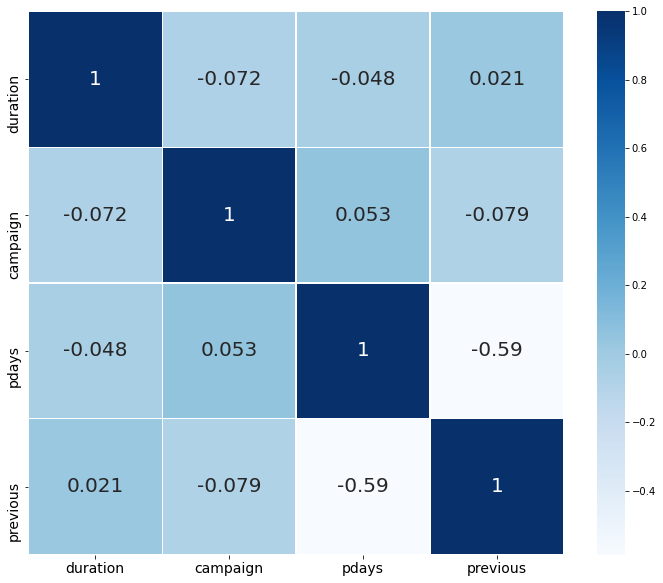

In [32]:
#dfArya.loc[(df.pdays == 999), 'pdays'] = np.nan
#dfArya.head()

corr = dfArya.corr()

sns.heatmap(corr,annot=True,cmap='Blues',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [33]:
dfArya = dfArya.select_dtypes(include = ['object']).copy()
dfArya.head()
new_poutcome = {"poutcome": {"nonexistent": 0, "failure": 1, "success": 2}}

**Box plots for further analysis**

To better understand the numeric columns, we used a boxplot analysis. We observed some outliers and we have decided to remove the outliers in data pre processing part

# boxplot

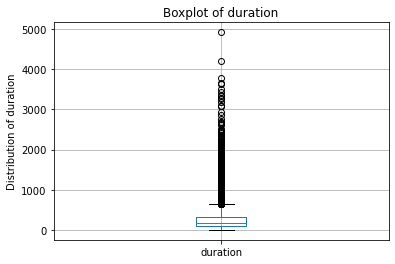

In [34]:
#duration boxplot
df.boxplot(['duration'])
plt.title("Boxplot of duration")
plt.ylabel('Distribution of duration') 

plt.show()

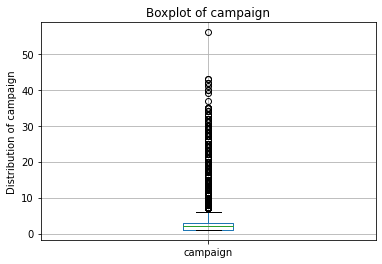

In [35]:
#campaign boxplot
df.boxplot(['campaign'])
plt.title("Boxplot of campaign")
plt.ylabel('Distribution of campaign') 

plt.show()

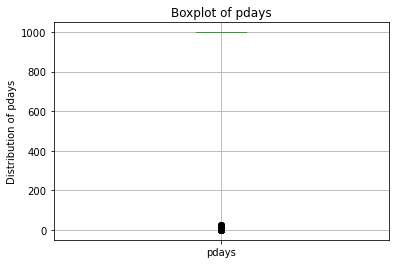

In [36]:
#pdays boxplot
df.boxplot(['pdays'])
plt.title("Boxplot of pdays")
plt.ylabel('Distribution of pdays') 

plt.show()

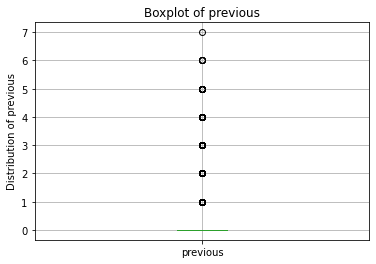

In [37]:
#previous boxplot
df.boxplot(['previous'])
plt.title("Boxplot of previous")
plt.ylabel('Distribution of previous') 

plt.show()

In [38]:
#histagrams of variables
# dfArya.hist(figsize=(14,10))
# plt.show()

In [39]:
yes=df.deposit=='yes'
no=df.deposit=='no'

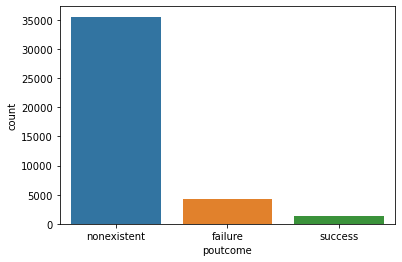

In [40]:
sns.countplot(x="poutcome", data=df)
plt.show()

**emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed**

In [41]:
#create dataframe of last five variables listed in original dataset
last_five=df[['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','deposit']].copy()

In [42]:
#create mask for yes and no reponses from target variable
yes=df.deposit=='yes'
no=df.deposit=='no'

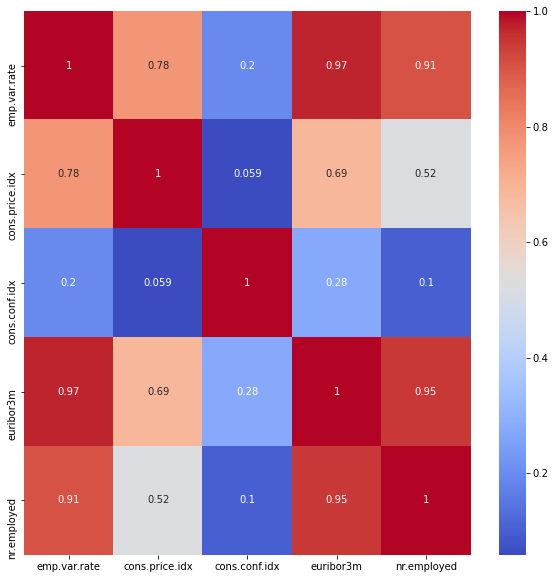

In [43]:
#correlation heatmap of variables
plt.figure(figsize=(10,10))
sns.heatmap(last_five.corr(),annot=True,cmap='coolwarm')
plt.show()

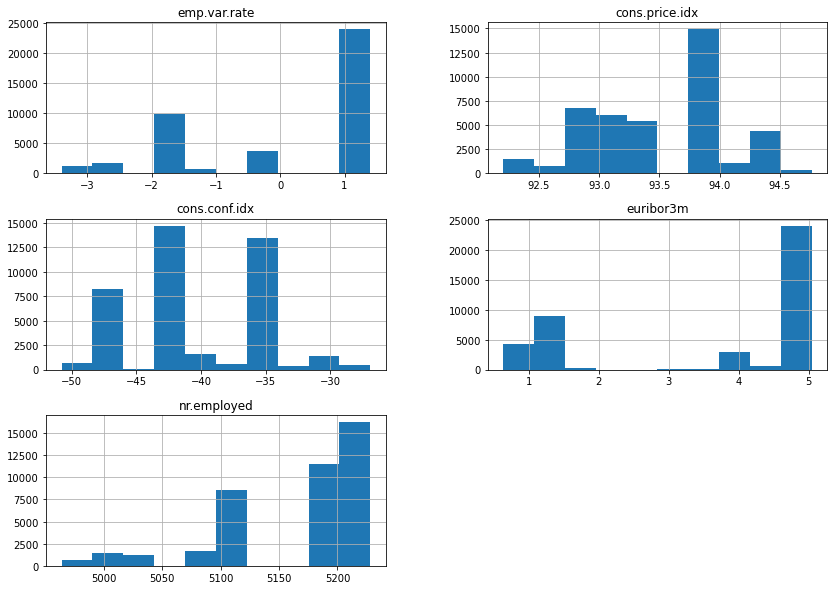

In [44]:
#histagrams of varaibles
last_five.hist(figsize=(14,10))
plt.show()

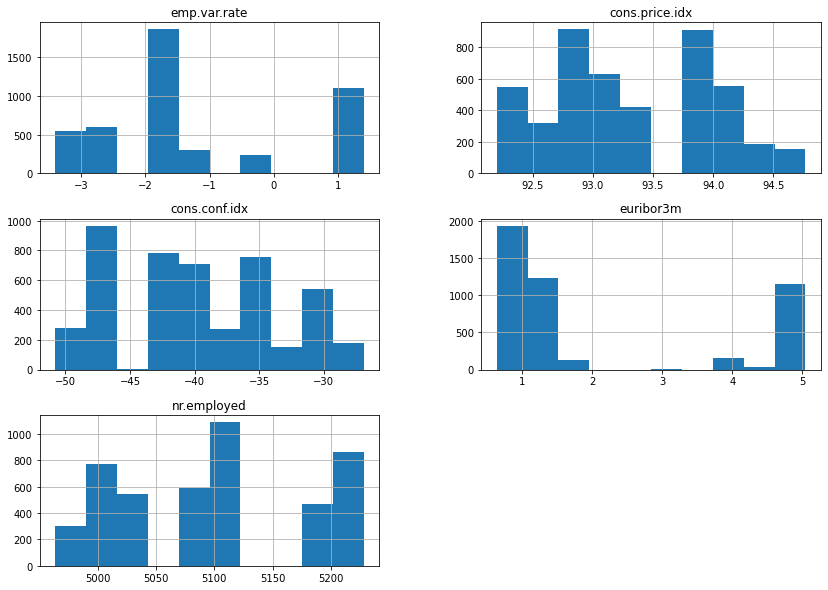

In [45]:
#histagrams of variables filtered by yes responses
last_five.loc[yes].hist(figsize=(14,10))
plt.show()

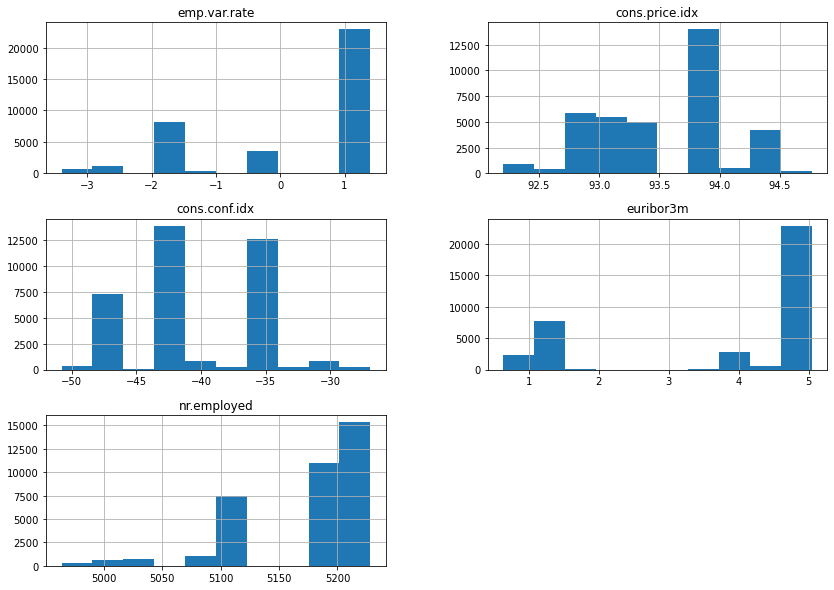

In [46]:
#histagram of variables filtered by no responses
last_five.loc[no].hist(figsize=(14,10))
plt.show()

Box plot distirubtions

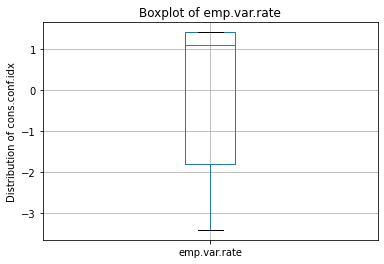

In [47]:
#emp.var.rate boxplot
df.boxplot(['emp.var.rate'])
plt.title("Boxplot of emp.var.rate")
plt.ylabel('Distribution of cons.conf.idx') 

plt.show()

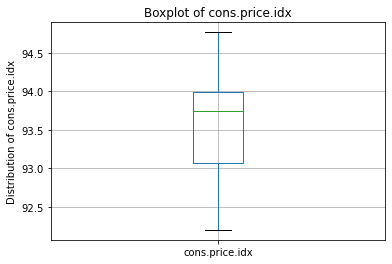

In [48]:
#cons.price.idx boxplot
df.boxplot(['cons.price.idx'])
plt.title("Boxplot of cons.price.idx")
plt.ylabel('Distribution of cons.price.idx') 

plt.show()

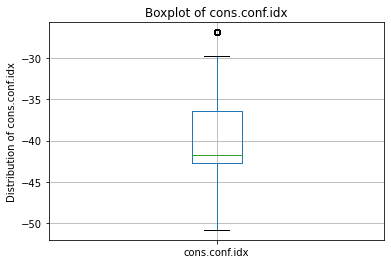

In [49]:
#cons.conf.idx boxplot
df.boxplot(['cons.conf.idx'])
plt.title("Boxplot of cons.conf.idx")
plt.ylabel('Distribution of cons.conf.idx') 

plt.show()

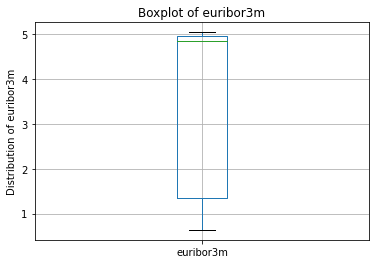

In [50]:
#euribor3m boxplot
df.boxplot(['euribor3m'])
plt.title("Boxplot of euribor3m")
plt.ylabel('Distribution of euribor3m') 

plt.show()

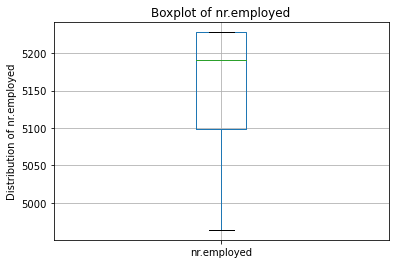

In [51]:
#nr.employed boxplot
df.boxplot(['nr.employed'])
plt.title("Boxplot of nr.employed")
plt.ylabel('Distribution of nr.employed') 

plt.show()

**Converting catagorical to numerical in dummy set**

In [52]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
df_dets['housing']  = labelencoder_X.fit_transform(df_dets['housing']) 
df_dets['loan']     = labelencoder_X.fit_transform(df_dets['loan']) 
df_dets['contact']     = labelencoder_X.fit_transform(df_dets['contact']) 
df_dets['month']       = labelencoder_X.fit_transform(df_dets['month']) 
df_dets['day_of_week'] = labelencoder_X.fit_transform(df_dets['day_of_week']) 

In [53]:
df_dets.head()

,housing,loan,contact,month,day_of_week
0,0,0,1,6,1
1,0,0,1,6,1
2,2,0,1,6,1
3,0,0,1,6,1
4,0,2,1,6,1


emp.var.rate

In [54]:
#crosstab showing the breakdown of yes and now responses
pd.crosstab(df['emp.var.rate'].loc[yes],df.deposit, margins=True, margins_name='Total',normalize='columns')

deposit,yes,Total
emp.var.rate,,
-3.4,0.097845,0.097845
-3.0,0.018966,0.018966
-2.9,0.128017,0.128017
-1.8,0.314871,0.314871
-1.7,0.086853,0.086853
-1.1,0.064871,0.064871
-0.2,0.000216,0.000216
-0.1,0.050000,0.050000
1.1,0.051724,0.051724


In [55]:
#crosstab showing the percentage breakdown of 
pd.crosstab(df['emp.var.rate'].loc[yes],df.deposit, margins=True, margins_name='Total',normalize='columns')

deposit,yes,Total
emp.var.rate,,
-3.4,0.097845,0.097845
-3.0,0.018966,0.018966
-2.9,0.128017,0.128017
-1.8,0.314871,0.314871
-1.7,0.086853,0.086853
-1.1,0.064871,0.064871
-0.2,0.000216,0.000216
-0.1,0.050000,0.050000
1.1,0.051724,0.051724


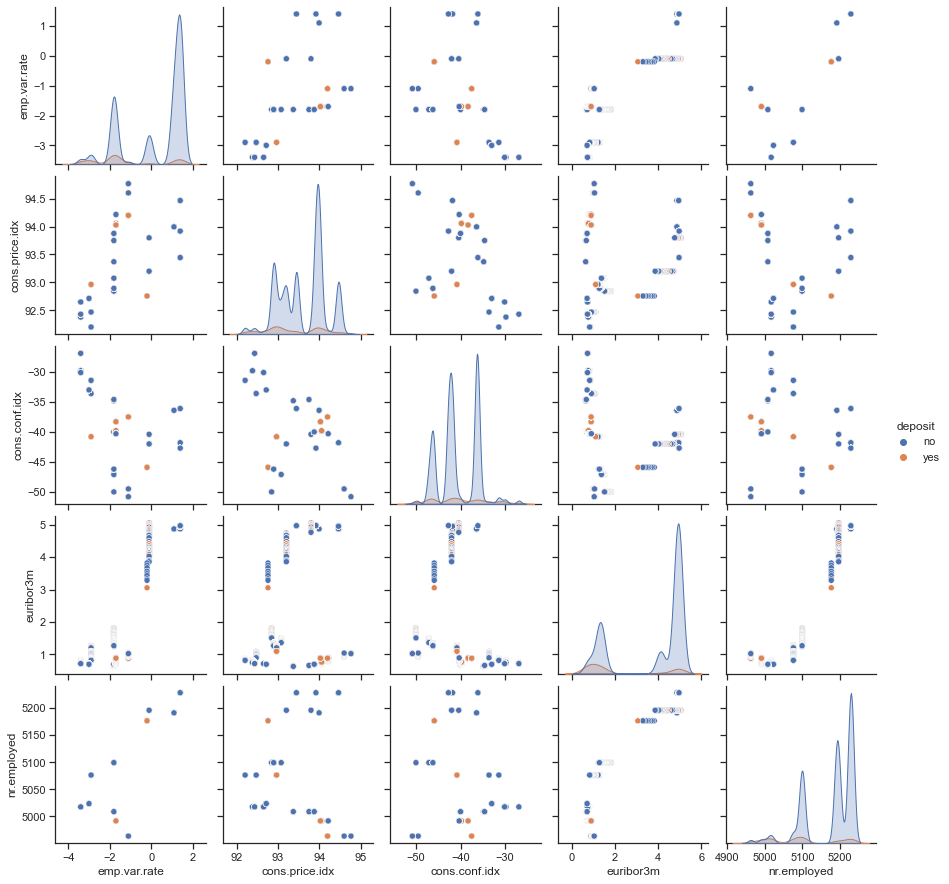

In [56]:
#scatter plot matrix colorcoded by yes or no
sns.set_theme(style='ticks')

sns.pairplot(last_five, hue="deposit")
plt.show()

# Data Pre-processing

Data pre-processing is a variety of techniques that involve transforming the raw data set into a more understandable format. Data sets are often incomplete, inconsistent and can possess errors that must be addressed. Data preprocessing steps have proven to resolve such issues and make the data set more user-friendly.

In [57]:
# Data Pre-processing

#df.info()
df.drop("duration", axis=1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [58]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
deposit            object
dtype: object

In [59]:
# Target Variable 
# Binary Encoding
df['deposit'] = np.where(df.deposit == 'yes', 1, 0)

### Cleaning Outliers Using Pyod

Boxplots proved to be the most beneficial visual when attempting to identify which variables have significant outliers. After highlighting the variables that need outlier cleaning, we relied on PyOD to help us do so. Using the K-nearest-neighbor method, we were able to eliminate outliers and reduce our data set from 41,188 rows to 37600 rows with only a few lines of code.

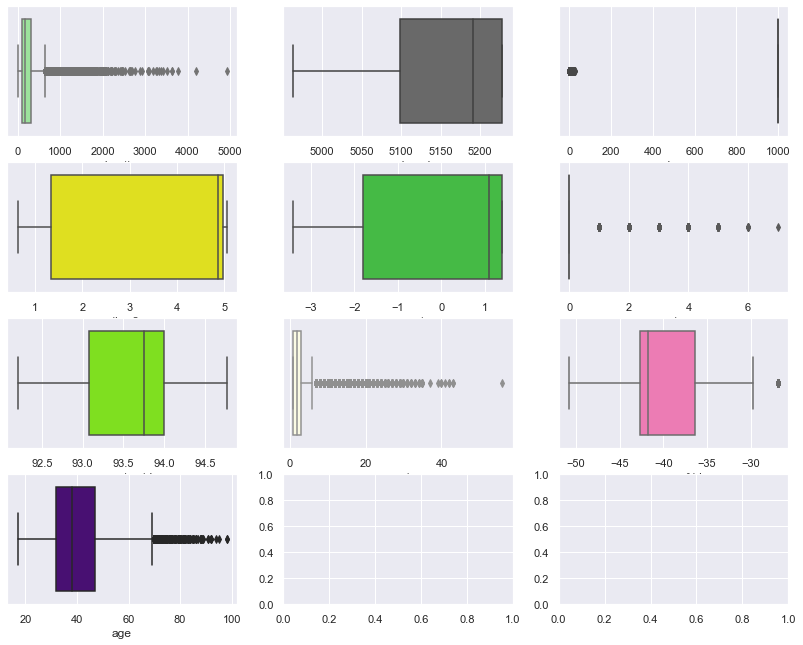

In [60]:
import random
from matplotlib.colors import cnames
corr = df.corr()['deposit'].abs().sort_values(ascending=False)
h_corr_cols = corr[corr < 1].index.tolist()
colors = list(cnames.keys())
sns.set_style('darkgrid')
fig , ax = plt.subplots(4,3,figsize = (14,11))
ax = ax.ravel()
for i,col in enumerate(h_corr_cols):
    sns.boxplot(df[col], ax = ax[i],color = random.choice(colors))

K-Nearest Neighbor: it uses the math behind the classification algorithm KNN. For any data point, the distance to its kth nearest neighbor could be viewed as the outlying score. PyOD supports three KNN detectors: largest, mean and median. 

The KNN, reasons in terms of ‘similarity’ which, in mathematical terms, could be translated as ‘distance’. 

In [61]:
x = df[h_corr_cols].values
model = KNN(contamination=.1)
model.fit(x)
predicted = model.predict(x)

outliers = df.loc[(predicted == 1),:]
inliers  = df.loc[(predicted == 0),:]

In [62]:
df.shape[0]

41188

In [63]:
df = df.drop(index = df.loc[(predicted == 1),:].index ) # Removing outliers

In [64]:
df.shape[0]

37600

### Removing Data Inconsistencies 

A few of the categorical variables in thhe data set had subgroups that could be grouped together in order to consolidate the amount of categories. To do this, we used the .replace() feature to clean up variables such as Education and Job.

In [65]:
df.education.value_counts().to_frame()

,education
university.degree,10978
high.school,8755
basic.9y,5699
professional.course,4781
basic.4y,3700
basic.6y,2180
unknown,1491
illiterate,16


In [66]:
df['education'].replace({'basic.9y': 'basic','basic.4y': 'basic','basic.6y':'basic'},inplace=True)

This code not only clean up the names of the categories, but also groups basic.4y, basic.6y and basic.9y into one new category called basic.

In [67]:
df['education'].value_counts().to_frame()

,education
basic,11579
university.degree,10978
high.school,8755
professional.course,4781
unknown,1491
illiterate,16


In [68]:
df.job.value_counts().to_frame()

,job
admin.,9493
blue-collar,8859
technician,6266
services,3760
management,2691
entrepreneur,1373
self-employed,1315
retired,1111
housemaid,961
unemployed,888


In [69]:
df['job'].replace({'entrepreneur': 'self-employed', 'technician': 'blue-collar',
                   'admin.': 'white-collar', 'management': 'white-collar',
                  'services': 'service-oriented', 'housemaid': 'service-oriented'}, inplace=True)

To consolidate the amount of categories in the job variable, we were able to add Entrepreneurship to self-employed, technician to blue collar, admin and mgmt to white collar, and services and housemaids to service oriented.

In [70]:
df.job.value_counts().to_frame()

,job
blue-collar,15125
white-collar,12184
service-oriented,4721
self-employed,2688
retired,1111
unemployed,888
student,596
unknown,287


In [71]:
df.shape

(37600, 21)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37600 entries, 0 to 41180
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37600 non-null  int64  
 1   job             37600 non-null  object 
 2   marital         37600 non-null  object 
 3   education       37600 non-null  object 
 4   default         37600 non-null  object 
 5   housing         37600 non-null  object 
 6   loan            37600 non-null  object 
 7   contact         37600 non-null  object 
 8   month           37600 non-null  object 
 9   day_of_week     37600 non-null  object 
 10  duration        37600 non-null  int64  
 11  campaign        37600 non-null  int64  
 12  pdays           37600 non-null  int64  
 13  previous        37600 non-null  int64  
 14  poutcome        37600 non-null  object 
 15  emp.var.rate    37600 non-null  float64
 16  cons.price.idx  37600 non-null  float64
 17  cons.conf.idx   37600 non-null 

### Feature Selection
**Creating an additional dataframe with a subset of the predictor variables for additional modling approaches**

Feature selection is often a key Data Mining step, since it is useful to discard irrelevant inputs, leading to simpler data-driven models that are easier to interpret and that tend to provide better predictive performances.

Feature selection is a process where we can automatically select those features in our data that contribute most to the prediction variable or predicting the class of interest.

Having irrelevant features in our data can decrease the accuracy of many models, especially linear algorithms like linear and logistic regression.

Three benefits of performing feature selection before modeling data are:

* Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
* Improves Accuracy: Less misleading data means modeling accuracy improves.
* Reduces Training Time: Less data means that algorithms train faster.

In [73]:
df_m2 = df[['age','job','marital','education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome', 'deposit']]
df_m2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37600 entries, 0 to 41180
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          37600 non-null  int64 
 1   job          37600 non-null  object
 2   marital      37600 non-null  object
 3   education    37600 non-null  object
 4   default      37600 non-null  object
 5   housing      37600 non-null  object
 6   loan         37600 non-null  object
 7   contact      37600 non-null  object
 8   month        37600 non-null  object
 9   day_of_week  37600 non-null  object
 10  duration     37600 non-null  int64 
 11  campaign     37600 non-null  int64 
 12  poutcome     37600 non-null  object
 13  deposit      37600 non-null  int32 
dtypes: int32(1), int64(3), object(10)
memory usage: 4.2+ MB


### Creating Indicator Variables
To split up the categorical variables into dummy or indicator variables, we had to select all variables with the dtype of object. We then used the pandas feature pd.get_dummies to create the dummies and store them in the dataset. And these columns will be used to represent subgroups in our regression if needed.

In [74]:
# categorical columns
# OneHotEncoding - Convert categorical variables into dummy/indicator variables.
cat_cols = df.select_dtypes(include=[
        'object']).columns
df = pd.get_dummies(df, columns=cat_cols)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37600 entries, 0 to 41180
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            37600 non-null  int64  
 1   duration                       37600 non-null  int64  
 2   campaign                       37600 non-null  int64  
 3   pdays                          37600 non-null  int64  
 4   previous                       37600 non-null  int64  
 5   emp.var.rate                   37600 non-null  float64
 6   cons.price.idx                 37600 non-null  float64
 7   cons.conf.idx                  37600 non-null  float64
 8   euribor3m                      37600 non-null  float64
 9   nr.employed                    37600 non-null  float64
 10  deposit                        37600 non-null  int32  
 11  job_blue-collar                37600 non-null  uint8  
 12  job_retired                    37600 non-null 

**Feature Selected dataframe**

In [76]:
# categorical columns
# OneHotEncoding - Convert categorical variables into dummy/indicator variables.
cat_cols2 = df_m2.select_dtypes(include=[
        'object']).columns
df_m2 = pd.get_dummies(df_m2, columns=cat_cols2)

In [77]:
df_m2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37600 entries, 0 to 41180
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            37600 non-null  int64
 1   duration                       37600 non-null  int64
 2   campaign                       37600 non-null  int64
 3   deposit                        37600 non-null  int32
 4   job_blue-collar                37600 non-null  uint8
 5   job_retired                    37600 non-null  uint8
 6   job_self-employed              37600 non-null  uint8
 7   job_service-oriented           37600 non-null  uint8
 8   job_student                    37600 non-null  uint8
 9   job_unemployed                 37600 non-null  uint8
 10  job_unknown                    37600 non-null  uint8
 11  job_white-collar               37600 non-null  uint8
 12  marital_divorced               37600 non-null  uint8
 13  marital_married 

### Feature Selection - Using Random Forest

####Assessing Feature importance with random forests
**Dimensionality Reduction - First Approach**

Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

Once we had transformed our categorical variables, we ended up with around 52 columns. In order to further reduce the dimensionality of our processed dataset and remove the overlap of information, we decided to use two different techniques for data reduction. 
* For our first approach, we ran a Random Forest Classifier. With the help of this technique, we were able to assess individual feature importance and select a subset of the more relevant variables. 
* We ended up selecting 36 of the total variables which had the highest variance levels. 
* These amount to about 93% of the total variance.


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37600 entries, 0 to 41180
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            37600 non-null  int64  
 1   duration                       37600 non-null  int64  
 2   campaign                       37600 non-null  int64  
 3   pdays                          37600 non-null  int64  
 4   previous                       37600 non-null  int64  
 5   emp.var.rate                   37600 non-null  float64
 6   cons.price.idx                 37600 non-null  float64
 7   cons.conf.idx                  37600 non-null  float64
 8   euribor3m                      37600 non-null  float64
 9   nr.employed                    37600 non-null  float64
 10  deposit                        37600 non-null  int32  
 11  job_blue-collar                37600 non-null  uint8  
 12  job_retired                    37600 non-null 

In [81]:
X_rf = df.drop(columns=['deposit'])
y_rf = df['deposit']

In [82]:
X_rf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37600 entries, 0 to 41180
Data columns (total 57 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            37600 non-null  int64  
 1   duration                       37600 non-null  int64  
 2   campaign                       37600 non-null  int64  
 3   pdays                          37600 non-null  int64  
 4   previous                       37600 non-null  int64  
 5   emp.var.rate                   37600 non-null  float64
 6   cons.price.idx                 37600 non-null  float64
 7   cons.conf.idx                  37600 non-null  float64
 8   euribor3m                      37600 non-null  float64
 9   nr.employed                    37600 non-null  float64
 10  job_blue-collar                37600 non-null  uint8  
 11  job_retired                    37600 non-null  uint8  
 12  job_self-employed              37600 non-null 

In [83]:
y_rf

0        0
1        0
2        0
3        0
4        0
        ..
41157    0
41167    0
41168    0
41171    1
41180    0
Name: deposit, Length: 37600, dtype: int32

In [87]:
X = df.drop(columns=['duration', 'deposit'])
y = df['deposit']

In [88]:
y.value_counts().to_frame()

,deposit
0,34895
1,2705


In [92]:
!pip install imblearn

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler 

sampler = RandomOverSampler(random_state=42)

X_sampled, y_sampled = sampler.fit_resample(X, y)
pd.Series(y_sampled).value_counts().to_frame()

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\n\\anaconda3\\Lib\\site-packages\\~-learn\\.libs\\vcomp140.dll'
Consider using the `--user` option or check the permissions.



ModuleNotFoundError: No module named 'imblearn'

NameError: name 'y_sampled' is not defined

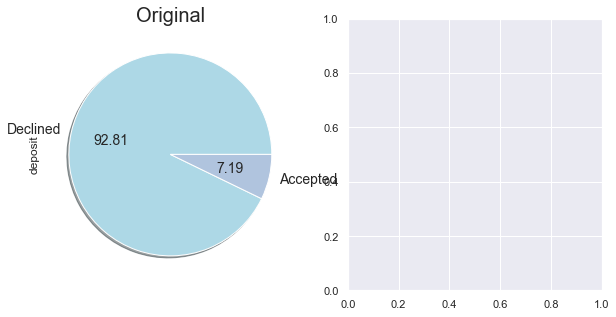

In [93]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
labels = 'Declined', 'Accepted'
autopct = "%.2f"
y.value_counts().plot.pie(autopct=autopct, ax=axs[0], shadow=True,labels=labels,fontsize=14,colors = ["lightblue","lightsteelblue"])
axs[0].set_title("Original", fontsize=20)
pd.Series(y_sampled).value_counts().plot.pie(autopct=autopct, shadow=True, labels=labels,fontsize=14,colors = ["lightblue","lightsteelblue"])
axs[1].set_title("Over-sampling", fontsize=20)
plt.show()

**Feature selected dataframe**

In [ ]:
X1 = df_m2.drop(columns=['duration', 'deposit'])
y1 = df_m2['deposit']
print(X1.shape)
print(y1.shape)

In [ ]:
y1.value_counts().to_frame()

In [ ]:
sampler = RandomOverSampler(random_state=42)

X1_sampled, y1_sampled = sampler.fit_resample(X1, y1)
pd.Series(y1_sampled).value_counts().to_frame()

In [ ]:
# X_rf = X_rf.drop(columns=['duration'])
y_rf = df['deposit']
print(X_rf.shape)
print(y_rf.shape)

In [ ]:
y_rf.value_counts().to_frame()

In [ ]:
sampler = RandomOverSampler(random_state=42)

X_rf_sampled, y_rf_sampled = sampler.fit_resample(X_rf, y_rf)
pd.Series(y_rf_sampled).value_counts().to_frame()

### Split Data into Training and Test Sets

In machine learning, it is a common practice to split data into two different sets. These two sets are the training set and the testing set. The training set is used for training the model and the testing set is used for testing the accuracy of the model.

While training a machine learning model we are trying to find a pattern that best represents all the data points with minimum error. It is vital to divide the dataset ito train and test partitions in order to avoid overfitting or underfitting. Overfitting is usually a sign of model being too complex. Underfitting usually means that your model is too simple to capture the complexities of the dataset.

Here we are using the split ratio of 70:30. We chose 0.3 of the data to be in the test set.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_sampled, y_sampled, test_size=0.2, random_state=0)

**Feature Selected dataframe**

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1_sampled, y1_sampled, test_size=0.2, random_state=0)

In [ ]:
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(
    X_rf_sampled, y_rf_sampled, test_size=0.2, random_state=0)

### Feature Selection - Using PCA

#### Principal Component Analysis
**Dimensionality Reduction - Second Approach**

Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a compressed form.

Generally this is called a data reduction technique. A property of PCA is that you can choose the number of dimensions or principal component in the transformed result.

* Our second approach was to run a principal component analysis. 
* Through PCA we ended up creating 21 uncorrelated variables while minimizing information loss.
* Together all 21 components account for about 95% of the total variance.

In this section, the code projects the original data which is 56 dimensional into 21 dimensions.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(.95)
# pca = PCA(n_components = 10)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
print(X_train.shape)
print(X_test.shape)
# print(X.shape)

In [ ]:
# # df_y = pd.DataFrame(data = y_sampled, columns = ['deposit'])

# df_X = pd.DataFrame(data = X_train, columns = ['PC_1', 'PC_2','PC_3', 'PC_4','PC_5','PC_6', 'PC_7','PC_8', 'PC_9','PC_10'])
# df_X

Explained Variance
The explained variance tells us how much information (variance) can be attributed to each of the principal components. 

In [ ]:
# combinedDf = pd.concat([df_X, df_y[['deposit']]], axis = 1)
pca.explained_variance_ratio_

Thus, the first principal component contains 38.54% of the variance and the second principal component contains 23.15% of the variance and so on. Together, all of the 21 components contain 95% of the information.

In [ ]:
# print(df_X.shape)
# print(df_y.shape)

**Feature Selected dataframe**

In [ ]:
pca1 = PCA(.95)
# pca = PCA(n_components = 10)
pca1.fit(X1_train)
X1_train = pca1.transform(X1_train)
X1_test = pca1.transform(X1_test)

In [ ]:
print(X1_train.shape)
print(X1_test.shape)
# print(X.shape)

In [ ]:
# combinedDf = pd.concat([df_X, df_y[['deposit']]], axis = 1)
pca1.explained_variance_ratio_

**Creating a dataframe with 36 variables having highest variance**

In [ ]:
# X_rf = df[['campaign' ,'duration' ,'nr.employed','pdays','deposit','cons.conf.idx','euribor3m','cons.price.idx','housing_yes','housing_no','job_white-collar','education_university.degree'  ,'job_blue-collar','marital_married','education_high.school','marital_single','day_of_week_thu','day_of_week_wed','day_of_week_mon','day_of_week_tue','education_basic','day_of_week_fri','loan_no','loan_yes','education_professional.course','job_service-oriented','previous','emp.var.rate', 'marital_divorced','job_self-employed','month_oct','default_no','default_unknown'  ,'month_mar','contact_telephone','contact_cellular' ,'poutcome_failure' ]]
X_rf = df[['campaign' ,'duration' ,'nr.employed','pdays','deposit','cons.conf.idx','euribor3m','cons.price.idx','housing_yes','housing_no','job_white-collar','education_university.degree'  ,'job_blue-collar','marital_married','education_high.school','marital_single','day_of_week_thu','day_of_week_wed','day_of_week_mon','day_of_week_tue','education_basic','day_of_week_fri','loan_no','loan_yes','education_professional.course','job_service-oriented','previous','emp.var.rate', 'marital_divorced','job_self-employed','month_oct','default_no','default_unknown'  ,'month_mar','contact_telephone','contact_cellular' ,'poutcome_failure' ]]
X_rf.info()

# Modeling 

###Baseline Model
A baseline is a method that uses heuristics, simple summary statistics, randomness to create predictions for a dataset. These predictions are then used to measure the baseline's performance.  A baseline is the result of a very basic model or solution. Once a baseline has been established the general practice is to then compare any other machine learning algorithm against it. Our objective through the baseline model is to simply compare and achieve better results from all successive models.

The Dummy classifier is therefore being used only as a simple baseline for the other classifiers i.e. any other classifier is expected to perform better on the given dataset.

**The baseline model gave us an accuracy of 49% with a precision and recall of 0.0.**

In [ ]:
dummy_model = DummyClassifier(strategy = 'most_frequent', random_state=0)
dummy_model.fit(X_train, y_train)

In [ ]:
print('score for baseline model : {0:.2f}'.format(dummy_model.score(X_test, y_test)))
print('accuracy for baseline model : {0:.2f}'.format(accuracy_score(y_test, dummy_model.predict(X_test))))

In [ ]:
print('confusion matrix for baseline model: \n {0}'.format(confusion_matrix(y_test, dummy_model.predict(X_test))))

In [ ]:
print('precision for baseline model : {0:.2f}'.format(precision_score(y_test, dummy_model.predict(X_test))))
print('recall for baseline model : {0:.2f}'.format(recall_score(y_test, dummy_model.predict(X_test))))

### Logistic Regression Model 1

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. For our dataset, the dependent variable is a binary in nature and contains data coded as 1 (yes, success) or 0 (no, failure). 

For our first Modeling approach, the 21 components that were created by running principal component analysis were used. The logistic regression model was then implemented.

**This model gave us an overall accuracy of 68% with a precision of 0.72 and recall of 0.61 for class ‘1’ (yes, success).**

Variables were selected by PCA.

In [ ]:
# run Logistic Regression model
logreg = LogisticRegression()
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg_cv=GridSearchCV(logreg,grid,cv=10)
# fitting the model
model = logreg_cv.fit(X_train, y_train)
# predicting the values
y_pred = logreg_cv.predict(X_test)

In [ ]:
# # run Logistic Regression model
# model = LogisticRegression()
# # fitting the model
# model.fit(X_train, y_train)
# # predicting the values
# y_scores = model.predict(X_test)

In [ ]:
scores = logreg_cv.score(X_test,y_test)

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(scores))

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

In [ ]:
# getting the auc roc curve
auc = roc_auc_score(y_test, y_pred)
print('Classification Report:')
print(classification_report(y_test,y_pred))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
print('ROC_AUC_SCORE is',roc_auc_score(y_test, y_pred))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [ ]:
logit_roc_auc = roc_auc_score(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, logreg_cv.predict_proba(X_test)[:,1])


plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Logistic Regression Model 2 
For our second Modeling approach, we used a subset of the available variables which were selected manually based on business knowledge. 

**We ended up with an overall accuracy of 63% and a precision of 0.63 and recall of 0.67 for class ‘1’ (yes, success).** These results were not as promising as our previous approach. 


**Using Feature Selected dataframe**
Variables were selected manually based on business intuitive knowledge.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
# run Logistic Regression model
logreg1 = LogisticRegression()
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg_cv1=GridSearchCV(logreg1,grid,cv=10)
# fitting the model
model1 = logreg_cv1.fit(X1_train, y1_train)
# predicting the values
y1_pred = logreg_cv1.predict(X1_test)

In [ ]:
scores1 = logreg_cv1.score(X1_test,y1_test)

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(scores1))

In [ ]:
y1_test

In [ ]:
y1_pred

In [ ]:
confusion_matrix = confusion_matrix(y1_test, y1_pred)
confusion_matrix

In [ ]:
# getting the auc roc curve
auc = roc_auc_score(y1_test, y1_pred)
print('Classification Report:')
print(classification_report(y1_test,y1_pred))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y1_test, y1_pred)
print('ROC_AUC_SCORE is',roc_auc_score(y1_test, y1_pred))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [ ]:
logit_roc_auc = roc_auc_score(y1_test, y1_pred)

fpr, tpr, thresholds = roc_curve(y1_test, logreg_cv1.predict_proba(X1_test)[:,1])


plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Logistic Regression Model 3

For our third and final attempt with logistic regression we further implemented the logistic regression model using the subset of variables selected through Random Forest. **We ended up with an overall accuracy of 88% and a precision of 0.86 and recall of 0.90 for class ‘1’ (yes, success).** This model was by far our best performing logistic regression model. And so, we decided to use the subset of variables/features used for this model, that were selected through random forest for all our subsequent models. 

**Using Feature Selected dataframe**
Variables were selected based on their high levels of importance and variance measures as demonstrated by the random forest model.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
# run Logistic Regression model
logreg2 = LogisticRegression()
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg_cv2=GridSearchCV(logreg2,grid,cv=10)
# fitting the model
model2 = logreg_cv2.fit(X_rf_train, y_rf_train)
# predicting the values
y_rf_pred = logreg_cv2.predict(X_rf_test)

In [ ]:
scores2 = logreg_cv2.score(X_rf_test,y_rf_test)

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(scores2))

In [ ]:
y_rf_test

In [ ]:
y_rf_pred

In [ ]:
confusion_matrix = confusion_matrix(y_rf_test, y_rf_pred)
confusion_matrix

In [ ]:
# getting the auc roc curve
auc = roc_auc_score(y_rf_test, y_rf_pred)
print('Classification Report:')
print(classification_report(y_rf_test,y_rf_pred))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_rf_test, y_rf_pred)
print('ROC_AUC_SCORE is',roc_auc_score(y_rf_test, y_rf_pred))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [ ]:
logit_roc_auc = roc_auc_score(y_rf_test, y_rf_pred)

fpr, tpr, thresholds = roc_curve(y_rf_test, logreg_cv2.predict_proba(X_rf_test)[:,1])


plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Support Vector Machines (SVM)
Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. SVM offers very high accuracy compared to other classifiers such as logistic regression, and decision trees. It is known for its kernel trick to handle nonlinear input spaces. The classifier separates data points using a hyperplane with the largest amount of margin. This is why an SVM classifier is also known as a discriminative classifier. SVM finds an optimal hyperplane which helps in classifying new data points.

The advantages of support vector machines are:

* Effective in high dimensional spaces.
* Still effective in cases where number of dimensions is greater than the number of samples.
* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
* Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.


For the SVM model, we utilized the subset of variables selected using Random Forest since these gave us better results with logistic regression model. 

**The SVM model gave us an overall accuracy of 88% with a precision of 0.85 and recall of 0.92 for class ‘1’ (yes, success).**

**Using Feature Selected dataframe**
Variables were selected based on their high levels of importance and variance measures as demonstrated by the random forest model.

In [ ]:
print(X_rf_train.shape)
print(X_rf_test.shape)

In [ ]:
from sklearn.svm import SVC

#svm = SVC(kernel='linear', C=100.0, random_state=0)
svm = svm.SVC(kernel='linear', C = 1.0)
svm.fit(X_rf_train, y_rf_train)

In [ ]:
y_rf_pred = svm.predict(X_rf_test)

In [ ]:
from sklearn.metrics import accuracy_score
scores3 = accuracy_score(y_rf_test, y_rf_pred)
print('Accuracy of logistic Support Vector Machine classifier on test set:: %.2f' % accuracy_score(y_rf_test, y_rf_pred))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_rf_test,y_rf_pred))

In [ ]:
# getting the auc roc curve
auc = roc_auc_score(y_rf_test, y_rf_pred)
print('Classification Report:')
print(classification_report(y_rf_test,y_rf_pred))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_rf_test, y_rf_pred)
print('ROC_AUC_SCORE is',roc_auc_score(y_rf_test, y_rf_pred))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [ ]:
SVM_roc_auc = roc_auc_score(y_rf_test, y_rf_pred)

#fpr, tpr, thresholds = roc_curve(y_rf_test, svm.predict_proba(X_rf_test)[:,1])


plt.figure()
plt.plot(fpr, tpr, label='Support Vector Machines (area = %0.2f)' % SVM_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('SVM_ROC')
plt.show()

### Decision Tree
Decision Tree Classifier is a simple Machine Learning model that is used in classification problems.
While implementing the decision tree model, we used the subset of variables selected using random forest model. Decision trees tend to be the method of choice for predictive modeling because they are relatively easy to understand and are also very effective. The basic goal of a decision tree is to split a population of data into smaller segments. 

**On implementing the decision tree model we ended up with an overall accuracy of 97% and a precision of 0.96 and recall of 1.0 for class ‘1’ (yes, success).**

**Using Feature Selected dataframe**
Variables were selected based on their high levels of importance and variance measures as demonstrated by the random forest model.

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_rf_train, y_rf_train)

# Predict the response for test dataset
y_rf_pred = clf.predict(X_rf_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_rf_test, y_rf_pred))

In [ ]:
print("Classification report - \n", classification_report(y_rf_test,y_rf_pred))

In [ ]:
# getting the auc roc curve
auc = roc_auc_score(y_rf_test, y_rf_pred)
print('Classification Report:')
print(classification_report(y_rf_test,y_rf_pred))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_rf_test, y_rf_pred)
print('ROC_AUC_SCORE is',roc_auc_score(y_rf_test, y_rf_pred))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [ ]:
#   “””Plot ROC curve for testing data”””
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(fpr, tpr,label= 'DecisionTree (area = %0.2f)' % auc)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.savefig('clf_ROC')
plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# from sklearn import model_selection
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC
# from sklearn.model_selection import train_test_split
# from sklearn import datasets
# import matplotlib.pyplot as plt

 

# plt.style.use('ggplot')
# seed = 50
# kfold = model_selection.KFold(n_splits=10, random_state=seed)

 

# models = []
# models.append(('LR', LogisticRegression()))
# models.append(('LDA', LinearDiscriminantAnalysis()))
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('CART', DecisionTreeClassifier()))
# models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC()))

 

# results = []
# names = []
# scoring = 'accuracy'
# for name, model in models:
#   kfold = model_selection.KFold(n_splits=10, random_state=seed)
#   cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
#   results.append(cv_results)
#   names.append(name)
#   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#   print(msg)

 

# fig = plt.figure(figsize=(10,10))
# fig.suptitle('How to compare sklearn classification algorithms')
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(names)
# plt.show()

# Model Comparison



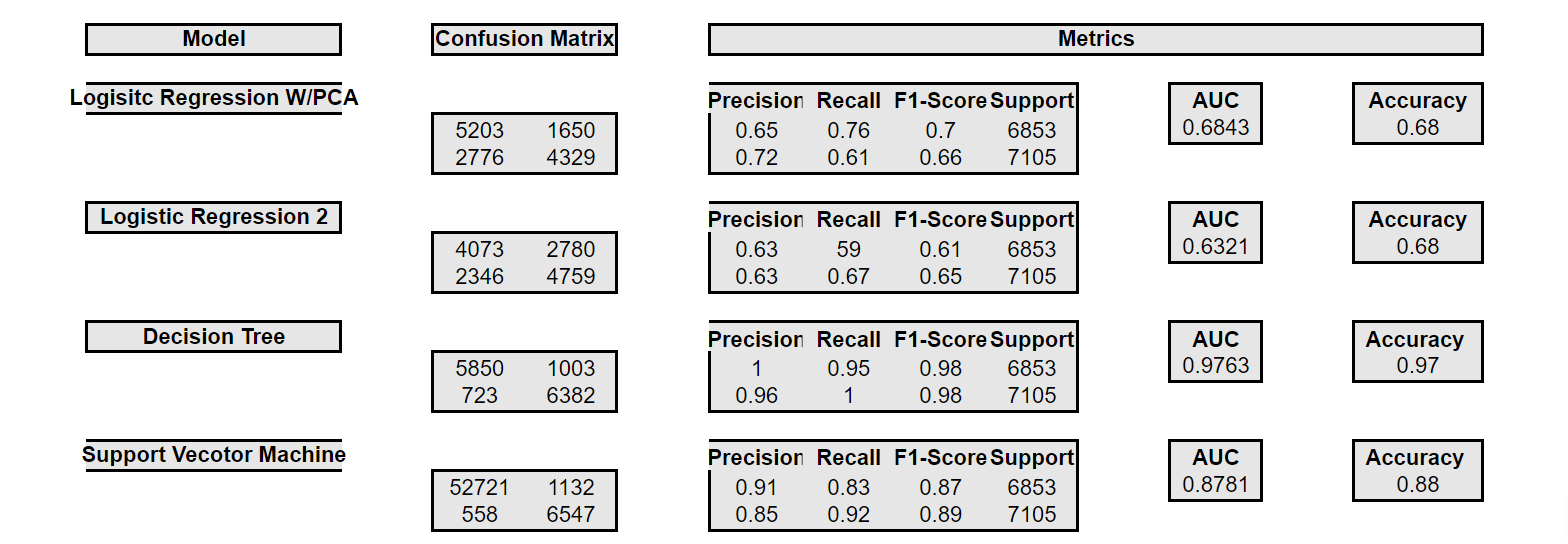

The accuracy of 97% obtained from the Decision Tree model, although promising seems to be overfitting the training and test partitions. The Decision Tree model is too complex and may not perform significantly well on new or unseen data. On the other hand, the SVM model with an overall accuracy of 88%, captures sufficient variance and inherent patterns from the training partition while remaining relatively less complex and performing well on the test partition. This model had a precision of 0.91 and recall of 0.83 for class ‘0’ (no, failure). Additionally, it exhibits a precision of 0.85 and recall of 0.92 for class ‘1’ (yes, success). 

Therefore, the SVM model has a better rate of classification and a higher accuracy of predictions for both (0, 1) classes of the categorical target variable and is our best performing model.

# Busness Recommendations


  Utilizing a model with high predictive accuracy is important in telemarketing because the costs of false positives can add up quickly. Our decision tree model outperformed every model that we constructed in terms of both precision, accuracy, and recall. Because of this we recommend that the bank incorporates our model into their workflow so that they can accurately identify leads that are highly likely to purchase the produce. 

  The decision tree model allowed us to identify the factors that have the largest impact on the prediction. When looking at this information three of the top ten variables were related to economic factors. The three variables related to the economy are emp.var.rate, cons.conf.idx, emp.var.rate. These variables represent the interest rate at which banks are giving personal unstructured loans, the rates banks are lending to each other at, and consumer confidence in their economic situations. Fixed term investments are generally considered lower risk, so it makes sense that more conversions occur when consumer confidence is low.  Overall investments in this product occur when consumer confidence is lower, interest rates on short term personal loans are also low and the cost to borrow between banks is low. With this information the bank can emphasize their marketing of term deposits when the economic conditions are the most favorable 

  The last takeaway from our analysis was that when you look at the variables pdays, campaign, and previous they all relate to number of customer contacts that occurred, time between contacts, and if they were contacted in previous campaigns. For all these variables the number yes values drop up with the increased number of contacts. Showing that if a client is going to purchase a product the sale needs to be closed early in the process. This is useful information for the business and marketers to have because they know that if they do not close the sale on the first call, they are unlikely to make the sale at all. Because the contact strategies are impactful further attention should be given to analyzing the sales techniques being utilized by the marketers to explore if additional training or changes to strategy could impact outcomes. 
  



# References
* Wisaeng, K. W. (2013). A Comparison of Different Classification Techniques for Bank Direct Marketing. A Comparison of Differn Classification Techniques for Bank Direct Marketing, 3(2231-2307).
* Moro, S., Cortez, P., & Rita, P. (2014). A data-driven approach to predict the success of bank telemarketing. Decision Support Systems, 62, 22–31. https://doi.org/10.1016/j.dss.2014.03.001
* Moro, S., Cortez, P., & Rita, P. (n.d.). Bank Marketing Data Set. UCI machine Learning Repository: Bank marketing data set. https://archive.ics.uci.edu/ml/datasets/bank+marketing.
* Shapiro, B. B., & Wyman, J. (2014, August 1). New ways to reach your customers. Harvard Business Review. https://hbr.org/1981/07/new-ways-to-reach-your-customers. 


# Submitted by Team 1

* Adam Zeigler
* Aishwary Bodhale
* Arya Patel
* Shaista Usman
